In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/Users/ismailbhamjee/Documents/hadith nlp/pdf_breakdown/sents.csv")

In [3]:
df

,number,sents,text_enpunct,sents_tokenized,sents_nonstop,sents_stemmed,hadith_lemmatized
0,0,etymology of the name of andalue—climate—geogr...,etymology of the name of andalueclimategeograp...,"['etymology', 'of', 'the', 'name', 'of', 'anda...","['etymology', 'name', 'andalueclimategeographi...","['etymolog', 'name', 'andalueclimategeograph',...","['etymolog', 'name', 'andalueclimategeograph',..."
1,0,"in the name of god, whose assistance we humbly...",in the name of god whose assistance we humbly ...,"['in', 'the', 'name', 'of', 'god', 'whose', 'a...","['name', 'god', 'whose', 'assistance', 'humbly...","['name', 'god', 'whose', 'assist', 'humbl', 'b...","['name', 'god', 'whose', 'assist', 'humbl', 'b..."
2,1,"for our part, we consider andalus as the priz...",for our part we consider andalus as the prize...,"['', 'for', 'our', 'part', 'we', 'consider', '...","['', 'part', 'consider', 'andalus', 'prize', '...","['', 'part', 'consid', 'andalu', 'prize', 'rac...","['', 'part', 'consid', 'andalu', 'prize', 'rac..."
3,0,especting the etymology of its name different ...,especting the etymology of its name different ...,"['especting', 'the', 'etymology', 'of', 'its',...","['especting', 'etymology', 'name', 'different'...","['espect', 'etymolog', 'name', 'differ', 'opin...","['espect', 'etymolog', 'name', 'differ', 'opin..."
4,1,"” who settled in it, and gave it his name, in...",who settled in it and gave it his name in li...,"['', 'who', 'settled', 'in', 'it', 'and', 'gav...","['', 'settled', 'gave', 'name', 'like', 'manne...","['', 'settl', 'gave', 'name', 'like', 'manner'...","['', 'settl', 'gave', 'name', 'like', 'manner'..."
...,...,...,...,...,...,...,...
4014,1,‘‘ most of the historians of this country see...,most of the historians of this country seem ...,"['', 'most', 'of', 'the', 'historians', 'of', ...","['', 'historians', 'country', 'seem', 'enterta...","['', 'historian', 'countri', 'seem', 'entertai...","['', 'historian', 'countri', 'seem', 'entertai..."
4015,2,"there can be no doubt, however, that he was a...",there can be no doubt however that he was a m...,"['', 'there', 'can', 'be', 'no', 'doubt', 'how...","['', 'doubt', 'however', 'mauli', 'abdul', 'az...","['', 'doubt', 'howev', 'mauli', 'abdul', 'aziz...","['', 'doubt', 'howev', 'mauli', 'abdul', 'aziz..."
4016,3,"his “« posterity, however, were famous for t...",his posterity however were famous for the c...,"['', 'his', 'posterity', 'however', 'were', 'f...","['', 'posterity', 'however', 'famous', 'comman...","['', 'poster', 'howev', 'famou', 'command', 'h...","['', 'poster', 'howev', 'famou', 'command', 'h..."
4017,4,NaN,NaN,[''],[''],[''],['']


In [4]:
x = df['hadith_lemmatized'].values.tolist()

In [5]:
len(x)

4019

In [6]:
import nltk

In [7]:
corpus=x
tok_corp = [nltk.word_tokenize(sent) for sent in corpus] #creates a corpus

In [8]:
from gensim import corpora, models, similarities 

In [9]:
import gensim

In [32]:
model= gensim.models.Word2Vec(tok_corp,min_count=2,window=8,vector_size=100,workers=4,alpha = 0.05)
model.train(tok_corp, total_examples=model.corpus_count, epochs=model.epochs)

AttributeError: module 'gensim.models' has no attribute 'doc2Vec'

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
import numpy as np

In [13]:
from matplotlib import pyplot as plt

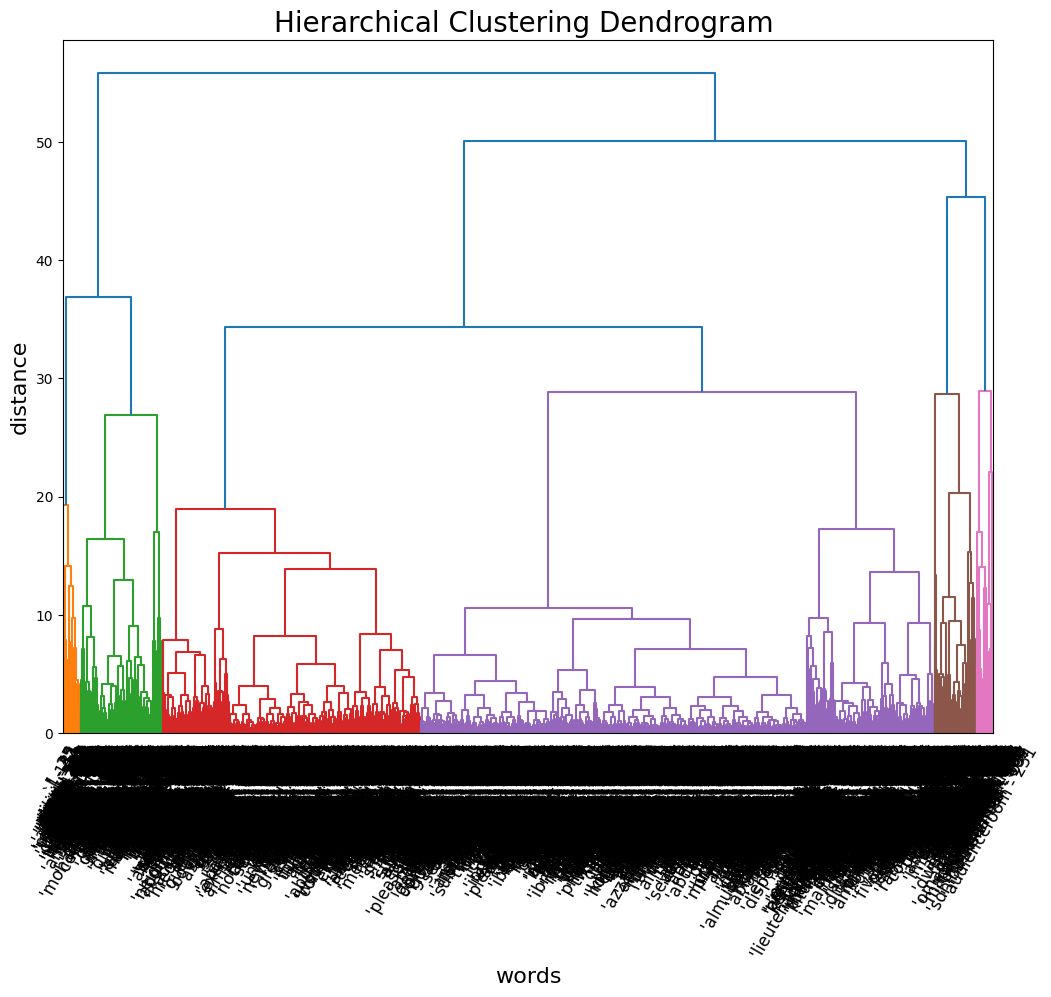

In [19]:
labels2 = model.wv.index_to_key
#print(labels2)
p = len(labels2)
np.version.version
matrix = model.wv.vectors
#print(matrix)

from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(matrix, 'ward')

p = len(labels2)

plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram ', fontsize=20)
plt.xlabel('words', fontsize=16)
plt.ylabel('distance', fontsize=16)


R = dendrogram(
                linked,
                truncate_mode='lastp',  # show only the last p merged clusters
                p=p,  # show only the last p merged clusters
                no_plot=True,
                )

## This  gives you a  label AND the count
temp = {R["leaves"][ii]:(labels2[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}
def llf(xx):
    return "{} - {}".format(*temp[xx])

#print("values passed to leaf_label_func\nleaves : ", R["leaves"])

dendrogram(
            linked,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            leaf_label_func=llf,
            leaf_rotation=60.,
            color_threshold=29,
            leaf_font_size=12.,
            show_contracted=True,  # to get a distribution impression in truncated branches
            )
plt.show()

In [14]:
numclust=5

In [20]:
from scipy.cluster.hierarchy import fcluster
label = fcluster(linked,numclust,criterion='maxclust')

In [27]:
df_list= pd.DataFrame()
df_list['text']=labels2
df_list['lable']=label

In [28]:
pd.set_option("display.max_rows", None)

In [29]:
print(df_list)

                       text  lable
0                         '      3
1                         ,      3
2                         [      5
3                         ]      3
4                        ``      3
5                      'one      4
6                      'ibn      5
7                   'andalu      4
8                     'citi      4
9                     'said      5
10                 'countri      4
11                    'time      4
12                     'say      5
13                   'great      4
14                    'work      5
15                  'author      5
16                    'name      5
17                    'book      5
18                    'call      4
19                    'also      4
20                 'cordova      4
21                  'follow      5
22                   'among      1
23                   'everi      2
24                    'well      1
25                     'god      1
26                    'king      5
27                  

In [ ]:
for x in fl:
    print(x)

In [ ]:
len(fl)

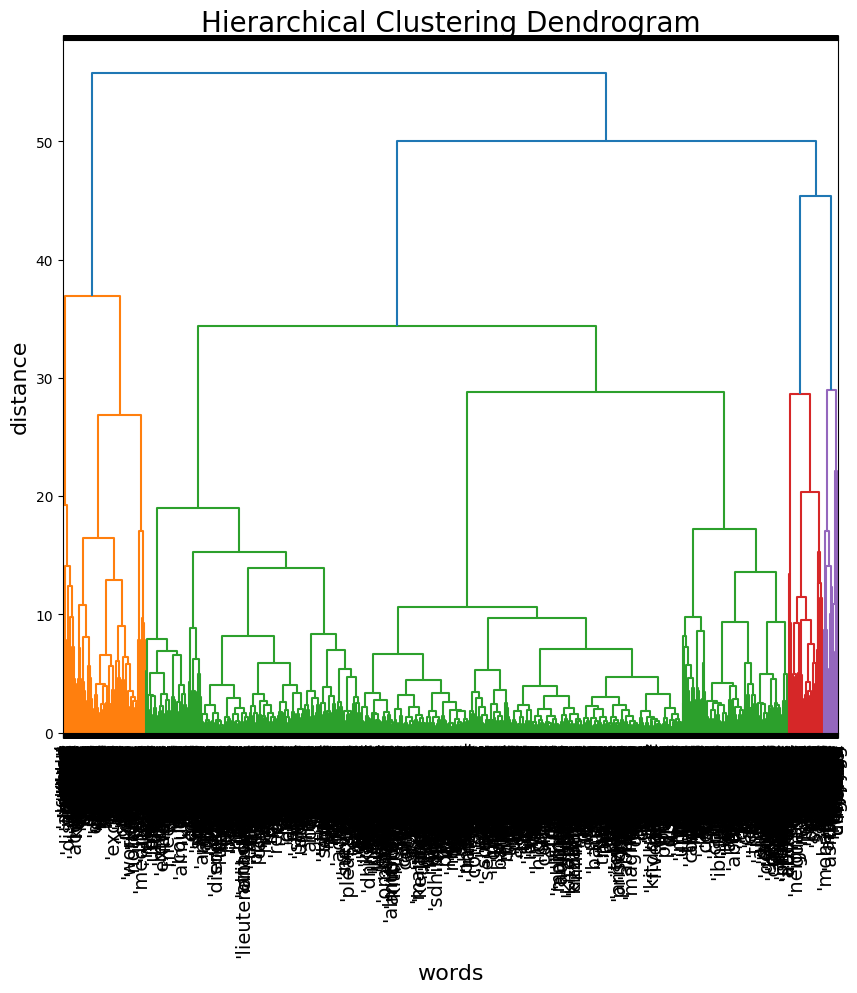

In [15]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(model.wv.vectors) #define the linkage_matrix using ward clustering pre-computed distances


fig, ax = plt.subplots(figsize=(10, 9)) # set size
ax = dendrogram(linkage_matrix, orientation="top", leaf_font_size=14,leaf_label_func=lambda v: str(model.wv.index_to_key[v]));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('words', fontsize=16)
plt.ylabel('distance', fontsize=16)
plt.show() #show plot with tight layout

#uncomment below to save figure
#plt.savefig('ward_clusters- fast text.png', dpi=300)

In [16]:
from scipy.cluster.hierarchy import fcluster
fl = fcluster(linkage_matrix,numclust,criterion='maxclust')

In [17]:
len(fl)

4376

In [18]:
df_list= pd.DataFrame()
df_list['text']=v
df_list['lable']=fl

NameError: name 'v' is not defined

In [33]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
j=0
for em in df['hadith_lemmatized'].values:
    all_content_train.append(LabeledSentence1(em,[j]))
    j+=1
print("Number of texts processed: ", j)

Number of texts processed:  4019


In [35]:
from gensim.models import Doc2Vec

In [42]:
model = Doc2Vec(all_content_train, vector_size = 200, window = 5, min_count = 1, workers=5, alpha= 0.003)
model.train(all_content_train,total_examples=model.corpus_count, epochs=model.epochs)

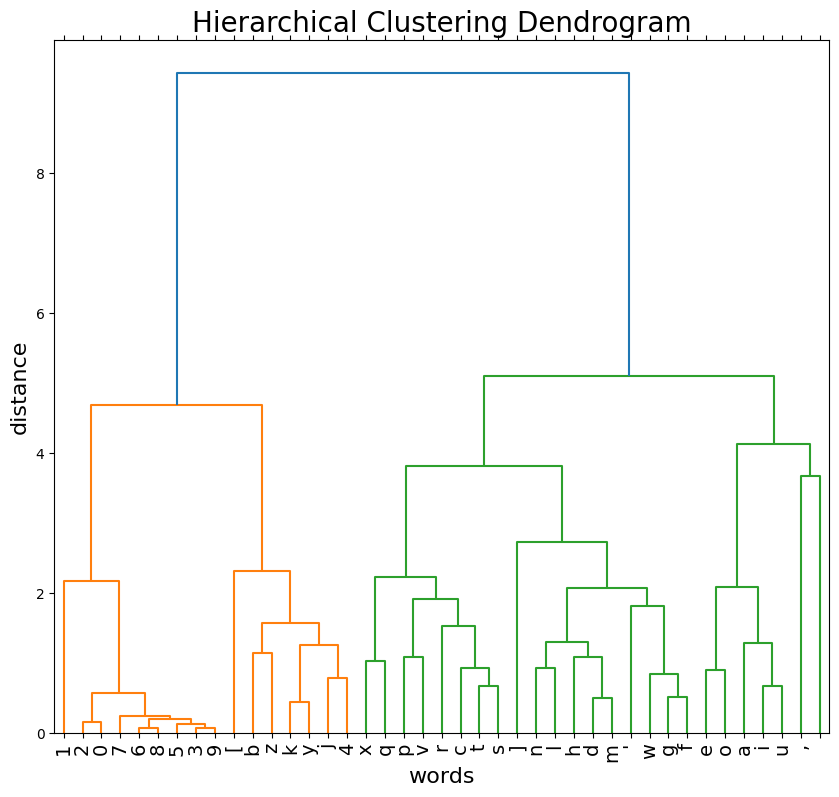

In [43]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(model.wv.vectors) #define the linkage_matrix using ward clustering pre-computed distances


fig, ax = plt.subplots(figsize=(10, 9)) # set size
ax = dendrogram(linkage_matrix, orientation="top", leaf_font_size=14,leaf_label_func=lambda v: str(model.wv.index_to_key[v]));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('words', fontsize=16)
plt.ylabel('distance', fontsize=16)
plt.show() #show plot with tight layout

#uncomment below to save figure
#plt.savefig('ward_clusters- fast text.png', dpi=300)

In [44]:
from scipy.cluster.hierarchy import fcluster
fl = fcluster(linkage_matrix,numclust,criterion='maxclust')

In [45]:
df_list= pd.DataFrame()
df_list['text']=['hadith_lemmatized']
df_list['lable']=fl

ValueError: Length of values (41) does not match length of index (1)

In [46]:
len(fl)

41